# Test evaluate method of SpiralArmsPotential
(by plotting the potential with various parameters)

Jack Hong

In [1]:
import sys
sys.path.insert(1, '/Users/jackhong/OneDrive/SURP/test_galpy_SpiralArmsPotential')

import galpy.potential_src.SpiralArmsPotential as spiral
import matplotlib.pyplot as plt
import numpy as np

## Default values
(N=2, alpha=0.3, r_ref=1, phi_ref=0, Rs=0.5, H=0.5, Cs=[1], omega=0)

In [2]:
def plot_spiral(spiral_pot):
    ax = spiral_pot.plot(xy=True, rmin=-2, rmax=2, zmin=-2, zmax=2, ncontours=7)
    ax.set_cmap('coolwarm')
    ax.colorbar = plt.colorbar(ax)

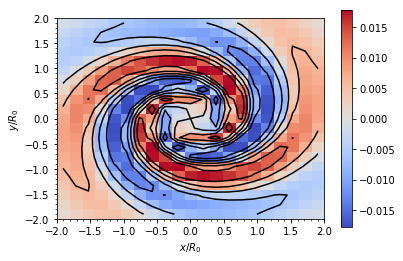

In [3]:
spiral_pot = spiral.SpiralArmsPotential()
plot_spiral(spiral_pot)
plt.show()

## Varying the reference angle $\phi_p$

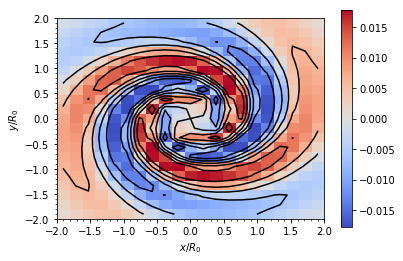

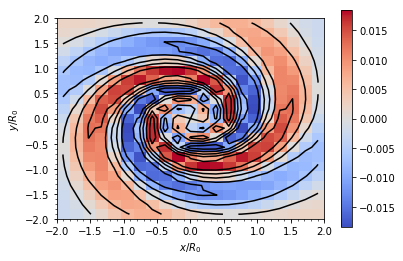

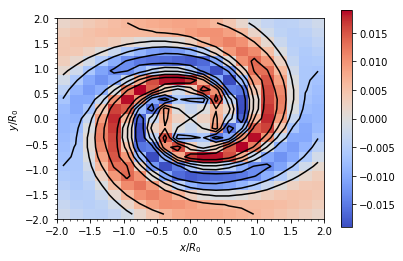

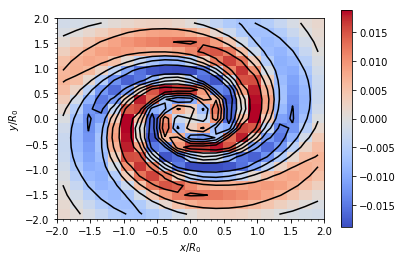

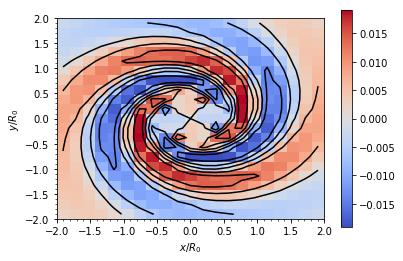

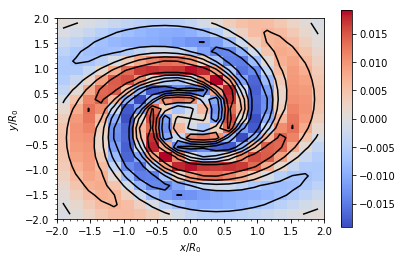

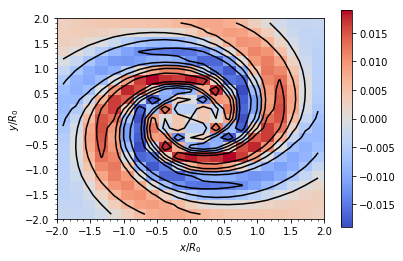

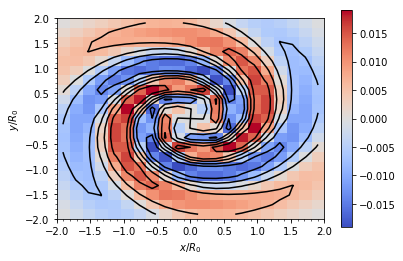

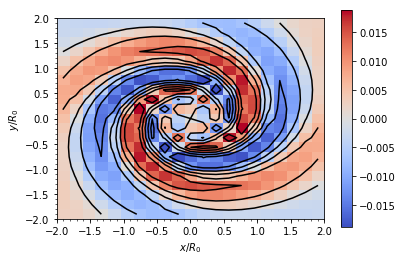

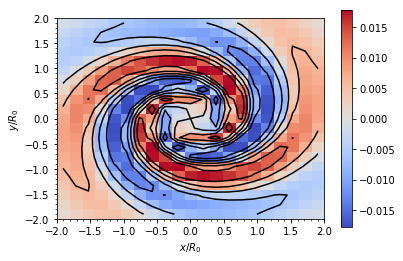

In [4]:
for phi_ref in np.linspace(0, 2*np.pi, 10):
    plot_spiral(spiral.SpiralArmsPotential(phi_ref = phi_ref))
    
plt.show()

## Varying the pitch angle $\alpha$

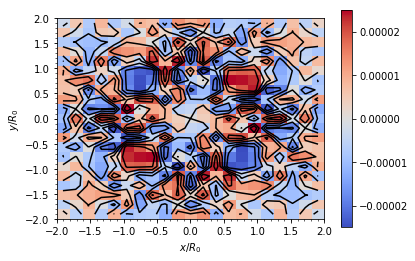

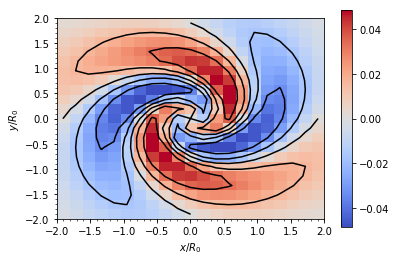

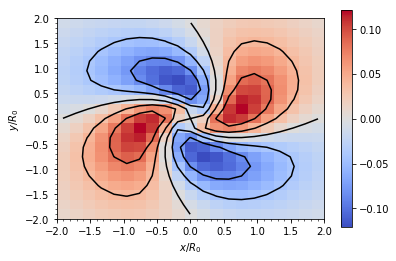

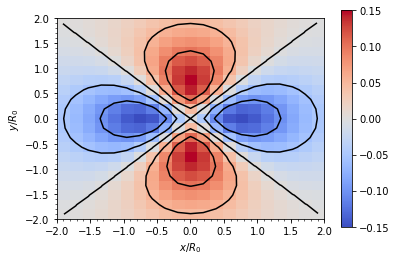

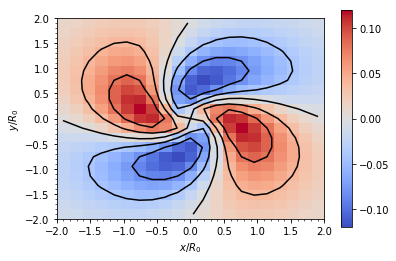

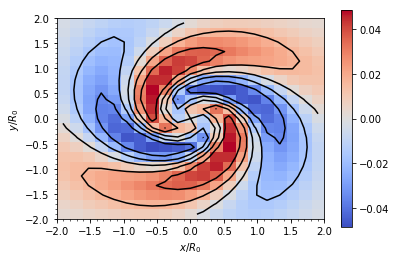

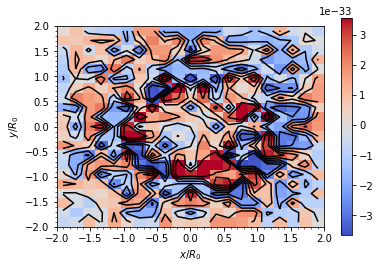

In [10]:
for alpha in np.linspace(0.01, np.pi, 7):
    plot_spiral(spiral.SpiralArmsPotential(alpha=alpha))

plt.show()

## Varying the number of arms $N$

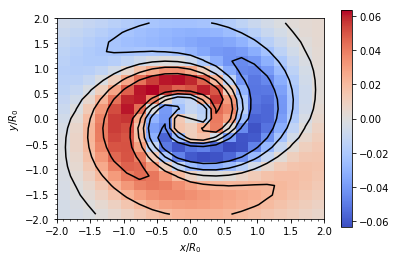

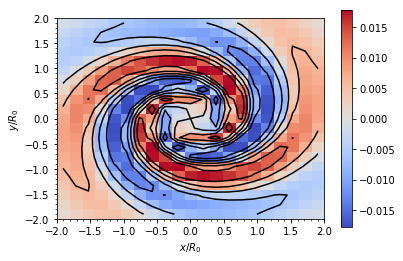

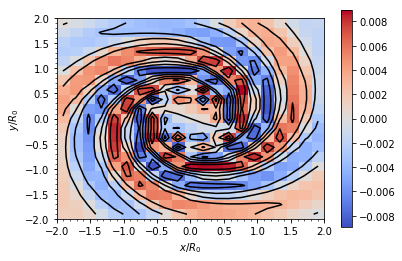

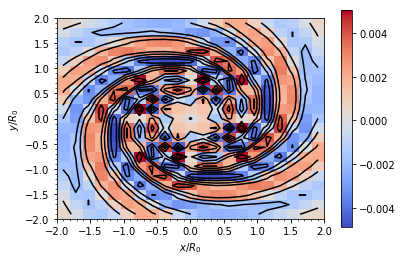

In [6]:
for N in range(1, 5):
    plot_spiral(spiral.SpiralArmsPotential(N=N))
    
plt.show()

## Varying the radial scale length $R_s$

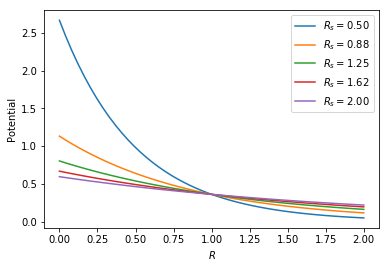

In [7]:
R = np.linspace(0, 2)
for Rs in np.linspace(0.5, 2, 5):
    spiral_pot = spiral.SpiralArmsPotential(Rs=Rs)
    plt.plot(R, spiral_pot(R, 0), label="$R_s = {:.2f}$".format(Rs))  # (R, z, phi) = (R, 0, 0)
    plt.xlabel("$R$")
    plt.ylabel("Potential")
 
plt.legend()
plt.show()

## Varying the scale height $H$

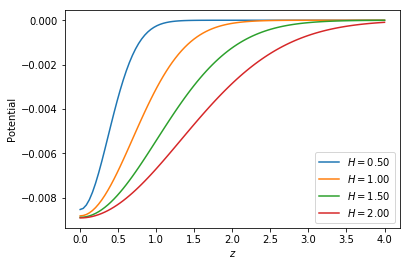

In [8]:
z = np.linspace(0, 4, 100)

for H in np.arange(0.5, 2.5, 0.5):
    spiral_pot = spiral.SpiralArmsPotential(H=H)
    pots = np.zeros(z.size)
    
    for k in np.arange(z.size):
        pots[k] = spiral_pot(0.5, z[k])

    
    plt.plot(z, pots, label="$H = {:.2f}$".format(H))  # (R, z, phi) = (1, z, 0)

plt.xlabel("$z$")
plt.ylabel("Potential")    
plt.legend()
plt.show()